In [1]:
# Units of variables given in the dataset:
#    elevation: meters above sea level
#    g: mm water equivalent per meter (db/dz)
#    continentality: degrees Celsius
#    cloud cover: percentage
#    summer temperature: degrees Celsius
#    precipitation: mm per year
#    average winter precipitation: mm per month 

# NOTE: climate variables are given from climatological gridded data (CRU) provided for the whole globe on ca 50x50 km grid
#
# Variables:
#                       g: [1x136 double]  glacier mass balance gradient (as an average over the observed period)
#        median_elevation: [1x136 double]  Median glacier elevation (derived from glacier hypsometry: glacier area vs elevation)
#      summer_temperature: [1x136 double]  Summer near-surface air temperature over a grid cell (ca 50x50 km) covering the glacier (averaged over the observed period)
#           precipitation: [1x136 double]  Total annaul precipitation over a grid cell (ca 50x50 km) covering the glacier (averaged over the observed period)
#                     lat: [1x136 double]  Geographical latitude of the glacier (in degrees)
#           max_elevation: [1x136 double]  Maximum glacier elevation
#                 WGMS ID: [1x136 int64]   Given glacier ID (from World Glacier Monitoring Service)
#    winter_precipitation: [1x136 double]  Same as for precipation but derived only over winter months 
#                     lon: [1x136 double]  Geographical longitude of the glacier (in degrees)
#             cloud_cover: [1x136 double]  Annual cloud cover over a grid cell (ca 50x50 km) covering the glacier (averaged over the observed period)
#          continentality: [1x136 double]  Maximum monthly temperature minus minimum monthly temperature over a year (over a grid cell covering the glacier and averaged over the observed period). The larger the continentality index the climate is more continental (rather than maritime). 


In [2]:
#import all required libraries etc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ipywidgets
import warnings
warnings.filterwarnings('ignore')


#NOTE: to get ipywidgets to work, need to enter the following into the command line:
#    conda install -c conda-forge ipywidgets
#    conda install -c conda-forge nodejs
#    jupyter lab --version
#Based on the version of jupyter lab, check https://npm.taobao.org/package/@jupyter-widgets/jupyterlab-manager for next command
#The final command should look something like:
#    jupyter labextension install @jupyter-widgets/jupyterlab-manager@1.0
#where the -manager@XX changes based on the version of jupyter that you have

In [3]:
#load the data and check it out

data = pd.read_csv('glaciers.csv')
data.head()

,g,median_elevation,summer_temperature,precipitation,lat,max_elevation,winter_precipitation,lon,cloud_cover,continentality
0,8.102728,1071.00,7.626667,483.990,-54.78,1172.5,36.273333,-68.40,63.393750,8.395
1,1.860170,2660.00,11.663333,1637.810,47.04,2950.0,91.578333,12.97,61.731667,18.830
2,9.194071,2560.00,14.881667,1521.845,47.48,2910.0,83.785000,13.62,61.529583,20.045
3,4.162200,3039.75,11.683333,1550.760,46.80,3715.5,93.790000,10.77,62.957083,18.725
4,4.411077,2795.00,10.561667,1726.480,46.85,3140.0,110.065000,10.15,64.265417,17.855


In [4]:
#clean data -- g<0 is non physical and this data point should be removed

data = data.drop(np.argwhere(data['g']<0)[0])

In [5]:
#normalize data and check it out

data_norm = (data - data.mean())/data.std()
data_norm.head()

,g,median_elevation,summer_temperature,precipitation,lat,max_elevation,winter_precipitation,lon,cloud_cover,continentality
0,0.729295,-1.127617,-0.610002,-1.008986,-4.510634,-1.305564,-0.826765,-0.917411,-0.073330,-1.567918
1,-1.252792,0.077903,0.303656,0.634920,-0.009790,0.000761,0.080425,0.221562,-0.285946,-0.270948
2,1.075809,0.002036,1.032093,0.469699,0.009659,-0.028636,-0.047412,0.230660,-0.311797,-0.119936
3,-0.521870,0.366006,0.308183,0.510896,-0.020399,0.563344,0.116703,0.190768,-0.129189,-0.283999
4,-0.442849,0.180323,0.054305,0.761253,-0.018189,0.140396,0.383669,0.182089,0.038174,-0.392131


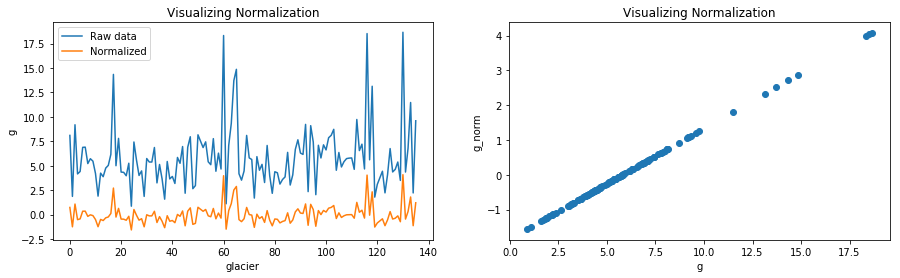

In [6]:
#visualize normalization

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.plot(data['g'])
plt.plot(data_norm['g'])
plt.legend(['Raw data','Normalized'])
plt.ylabel('g')
plt.xlabel('glacier')
plt.title('Visualizing Normalization')

plt.subplot(1,2,2)
plt.scatter(data['g'],data_norm['g'])
plt.ylabel('g_norm')
plt.xlabel('g')
plt.title('Visualizing Normalization')

plt.show()

In [7]:
#unpack normalized data
lat = data_norm['lat']
lon = data_norm['lon']
hmax = data_norm['max_elevation']
hmed = data_norm['median_elevation']
g = data_norm['g']
Pannual = data_norm['precipitation']
Pwinter = data_norm['winter_precipitation']
CI = data_norm['continentality']
cloud = data_norm['cloud_cover']
Tsummer = data_norm['summer_temperature']

SOLUTIONS

###  What are the most characteristic features in the space of these variables? 
m=10, n=136 -> 10 dimensions and 136 samples

In [8]:
## We want to run PCA
n_modes = np.min(np.shape(data_norm))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data_norm)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

n=3
print(np.sum(fracVar[:n])*100)  #sum of the first n modes = total percent variance explained by the first neigvecs
print(np.shape(eigvecs))

79.02785118463652
(10, 10)


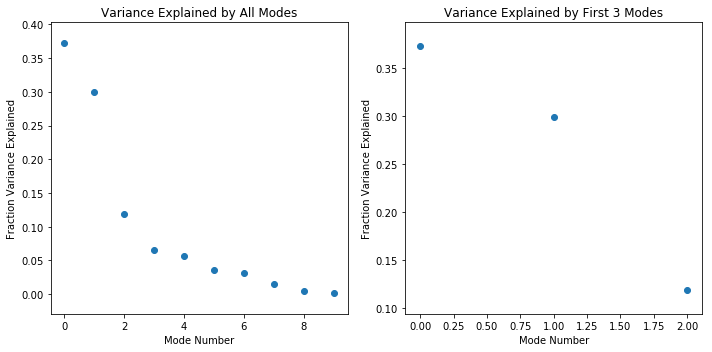

In [9]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = n
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

In [10]:
#investigate: did PCA work as we expected?  What size of variables do we expect?

nObservations = np.shape(data_norm)[0] #number of images
nVariables = np.shape(data_norm)[1] #number of pixels in each image (i.e. the number of variables that defines each observation)

print('Expected sizes:')
print('\t' + str(nVariables) + ' eigenvectors, each of length ' + str(nVariables))
print('\t' + str(nVariables) + ' eigenvalues, one for each eigenvector')
print('\t' + str(nVariables) + ' PCs, each of length ' + str(nObservations))

print('Actual sizes:')
print('\t' + str(np.shape(eigvecs)[0]) + ' eigenvectors, each of length ' + str(np.shape(eigvecs)[1]))
print('\t' + str(len(fracVar)) + ' eigenvalues')
print('\t' + str(np.shape(PCs)[1]) + ' PCs, each of length ' + str(np.shape(PCs)[0]))





Expected sizes:
	10 eigenvectors, each of length 10
	10 eigenvalues, one for each eigenvector
	10 PCs, each of length 135
Actual sizes:
	10 eigenvectors, each of length 10
	10 eigenvalues
	10 PCs, each of length 135


## Most characteristic features should be the first 3 

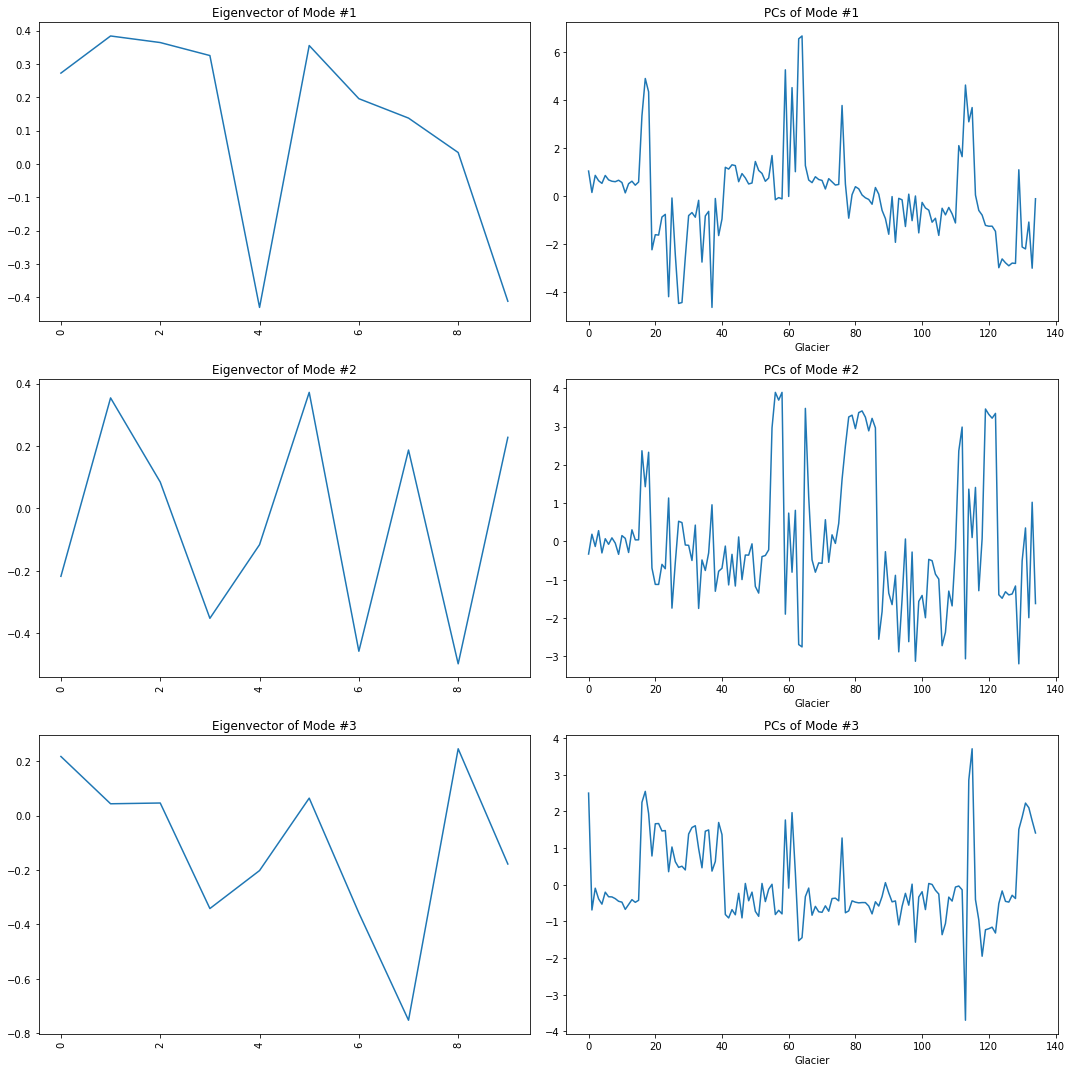

In [11]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
#     plt.plot(list(data_norm.columns),eigvecs[kk])
    plt.plot(eigvecs[kk])
    plt.xticks(rotation=90)
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Glacier')
    
plt.tight_layout()

## Reconstruction using the significant modes

In [12]:
numModes = n
numObs = np.max(np.shape(data_norm))

glacier_rec = np.empty_like(data_norm)
glacier_mean = data_norm.mean(axis=1)


for kk in range(numObs): #for each glacier
    this_glacier_rec = np.zeros_like(data_norm.iloc[0,:])                               
    for mode in range(numModes):
        this_glacier_rec += eigvecs[mode,:]*PCs[kk,mode]
    glacier_rec[kk,:] = this_glacier_rec

## Plot 136 reconstructions! - under construction

## Find minimum RMSE between reconstruction and original

In [13]:
error = data_norm - glacier_rec
RMSE = np.sqrt(np.sum(error**2,axis=1)/32/32)

minRMSE = np.min(RMSE)
ind_minRMSE = np.argmin(RMSE)

RMSE_sort = np.sort(RMSE)
RMSE_sort_inds = np.argsort(RMSE,axis=0)

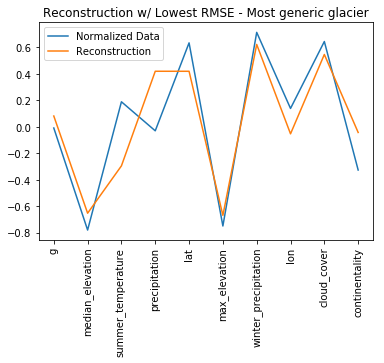

In [16]:
plt.plot(data_norm.iloc[ind_minRMSE,:])
plt.plot(glacier_rec[ind_minRMSE,:])
plt.legend(['Normalized Data','Reconstruction'])
plt.title('Reconstruction w/ Lowest RMSE - Most generic glacier')
plt.xticks(rotation=90)
plt.show()

## Reconstruction with multiple modes

In [ ]:
numObs = np.shape(data_norm)[0]
numModes_to_test = range(1,11)

for numModes in numModes_to_test: #loop through varying number of modes 

    data_rec = np.empty_like(data_norm)

    for kk in range(numObs): #for each glacier

        this_glacier_rec = np.zeros_like(data_norm.iloc[0,:])

        for mode in range(numModes):

            this_glacier_rec += eigvecs[mode,:]*PCs[kk,mode]

        data_rec[kk,:] = this_glacier_rec
        
    #find minimum RMSE between reconstruction and original

    error = data_norm - data_rec
    RMSE = np.sqrt(np.sum(error**2,axis=1)/32/32)

    minRMSE = np.min(RMSE)
    ind_minRMSE = np.argmin(RMSE)

    RMSE_sort = np.sort(RMSE)
    RMSE_sort_inds = np.argsort(RMSE,axis=0)
    
    plt.figure(figsize=(8,4*len(numModes_to_test)))
    plt.subplot(len(numModes_to_test),1,numModes)
    plt.plot(data_norm.iloc[ind_minRMSE,:])
    plt.plot(data_rec[ind_minRMSE,:])
    plt.legend(['Normalized Data','Reconstruction'])
    plt.title('Reconstruction w/ Lowest RMSE: Using ' + str(numModes) + ' Modes')
    plt.xticks(rotation=90)
    plt.tight_layout()